In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns
import os

from sklearn.model_selection import KFold, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

from lightgbm import LGBMRegressor
from tqdm import tqdm
import optuna
from functools import partial
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [89]:
train = pd.read_csv('..\\kaggle_data\\train.csv')
test = pd.read_csv('..\\kaggle_data\\test.csv')

In [90]:
root_directory = 'N:\\kaggle_data\\march'
wave = '7'
preds_target = f'{root_directory}\\w{wave}_preds'
subs_target = f'{root_directory}\\w{wave}_subs'
study_target = f'{root_directory}\\w{wave}_study'

In [91]:
preds_list_final_iterations = np.load(f'{root_directory}\\w{wave}_preds\\_preds_list_final_iterations.npy')
preds_list_final_iteration_scores = np.load(f'{root_directory}\\w{wave}_preds\\_preds_list_final_iteration_scores.npy')

<AxesSubplot:ylabel='target'>

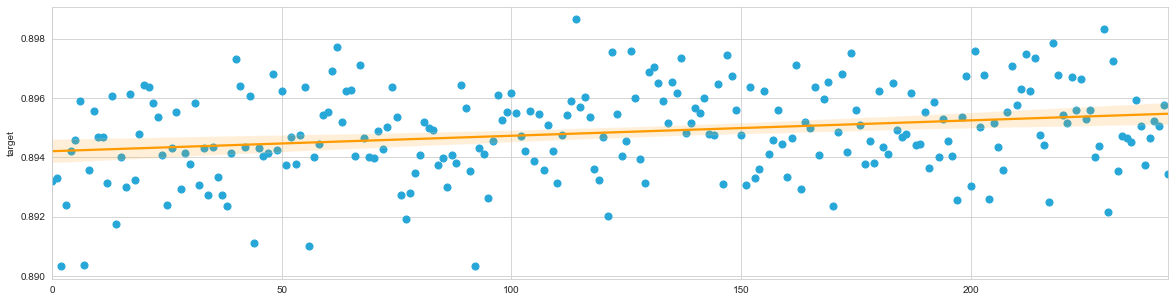

In [92]:
a4_dims = (20, 5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)

data = pd.DataFrame(preds_list_final_iteration_scores,columns = ['target'])
sns.regplot(ax=ax, x=data.index, y="target", data=data, x_estimator=np.mean, scatter_kws={"color": "#27a7d8"}, line_kws={"color": "#ff9a00"})

In [54]:
working_set = []

for x in range(0, len(preds_list_final_iteration_scores)):
    this_set = []
    this_set.append(preds_list_final_iteration_scores[x])
    this_set.append(preds_list_final_iterations[x])
    working_set.append(this_set)
cluster_data = pd.DataFrame(working_set,columns = ['target','data'])
cluster_data

,target,data
0,0.893200,"[0.06637021439286846, 0.41439965248850236, 0.0..."
1,0.893294,"[0.1055852845804478, 0.39203122318504774, -0.0..."
2,0.890319,"[0.12232117173959894, 0.4801070854403847, 0.00..."
3,0.892396,"[0.12618277025074226, 0.3889435381689499, 0.00..."
4,0.894216,"[0.09699672375704535, 0.4383731094406541, 0.01..."
...,...,...
207,0.893567,"[0.0992272326161013, 0.3671492933789307, -0.01..."
208,0.895518,"[0.12064255337310517, 0.3652899470870316, 0.00..."
209,0.897091,"[0.11348317402467475, 0.44874623178193884, 0.0..."
210,0.895759,"[0.11730436070861144, 0.3780804943928165, 0.01..."


In [63]:
threshold = 0.896
filtered_data = cluster_data[cluster_data['target']>threshold]
filtered_data['data'].mean()[1]

0.3816456307075928

In [66]:
submission = pd.DataFrame({'id':test.id,
          'target':filtered_data['data'].mean()})
file_target = f'{root_directory}\\w{wave}_subs\\greater_than_0_896.csv'
submission.to_csv(file_target, index=False)